<a href="https://colab.research.google.com/github/cosminnedescu/ProjectMLDL/blob/main/plots/Plot_test_accuracies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!rm -rf ProjectMLDL
if not os.path.isdir('/content/ProjectMLDL'):
  !git clone https://github.com/cosminnedescu/ProjectMLDL.git
  %cd /content/ProjectMLDL
  !rm -rf LICENSE README.md

Cloning into 'ProjectMLDL'...
remote: Enumerating objects: 497, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 497 (delta 73), reused 50 (delta 50), pack-reused 389
Receiving objects: 100% (497/497), 15.97 MiB | 19.06 MiB/s, done.
Resolving deltas: 100% (222/222), done.
/content/ProjectMLDL


In [4]:
from data.utils_plot import plot_train_val

## Plot Test Accuracies

In [34]:
#upload fine tuning test accuracies
jsonfile = open("states/FineTuning_test_accuracy.json")
FineTuning_test_accuracy = json.load(jsonfile) #lista di liste

#upload joint training test accuracies
jsonfile = open("states/JointTraining10_test_accuracy.json")
JointTraining10_test_accuracy =json.load(jsonfile)

jsonfile = open("states/JointTraining13_test_accuracy.json")
JointTraining13_test_accuracy =json.load(jsonfile)

jsonfile = open("states/JointTraining42_test_accuracy.json")
JointTraining42_test_accuracy =json.load(jsonfile)

JointTraining_test_accuracy = JointTraining10_test_accuracy + JointTraining13_test_accuracy + JointTraining42_test_accuracy

#upload lwf test accuracies
jsonfile = open("states/LWF10_test_accuracy.json")
Lwf10_test_accuracy = json.load(jsonfile)



In [56]:
FineTuning_test_accuracy = np.array(FineTuning_test_accuracy)
JointTraining_test_accuracy = np.array(JointTraining_test_accuracy)
Lwf10_test_accuracy = np.array(Lwf10_test_accuracy)

FineTuning_test_accuracy_stats = np.array([FineTuning_test_accuracy.mean(0) * 100, FineTuning_test_accuracy.std(0) * 100]).transpose()
JointTraning_test_accuracy_stats = np.array([JointTraining_test_accuracy.mean(0) * 100, JointTraining_test_accuracy.std(0) * 100]).transpose()
Lwf10_test_accuracy_stats = np.array([Lwf10_test_accuracy.mean(0) * 100, Lwf10_test_accuracy.std(0) * 100]).transpose()


array([[72.09821429,  0.        ],
       [52.39583333,  0.        ],
       [45.24456522,  0.        ],
       [36.9203629 ,  0.        ],
       [33.37339744,  0.        ],
       [25.49252717,  0.        ],
       [23.91493056,  0.        ],
       [21.11895161,  0.        ],
       [20.75892857,  0.        ],
       [16.90705128,  0.        ]])

In [59]:
def plot_test_accuracy(finetuning, jointtraining, lwf, save_directory = None):
  finetuning_mean = np.array(finetuning)[:, 0]
  finetuning_std = np.array(finetuning)[:, 1]
  jointtraining_mean = np.array(jointtraining)[:, 0]
  jointtraining_std = np.array(jointtraining)[:, 1]
  lfw_mean = np.array(lwf)[:, 0]
  lfw_std = np.array(lwf)[:, 1]
  fig, ax = plt.subplots(figsize = (10, 5), dpi = 100)
  x = np.arange(10, 101, 10)
  ax.errorbar(x, finetuning_mean, finetuning_std, label = 'Fine Tuning')
  ax.errorbar(x, jointtraining_mean, jointtraining_std, label = 'Joint Training')
  ax.errorbar(x, lfw_mean, lfw_std, label = 'LearningWithoutForgetting')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.title("Test Accuracies", loc="center")
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

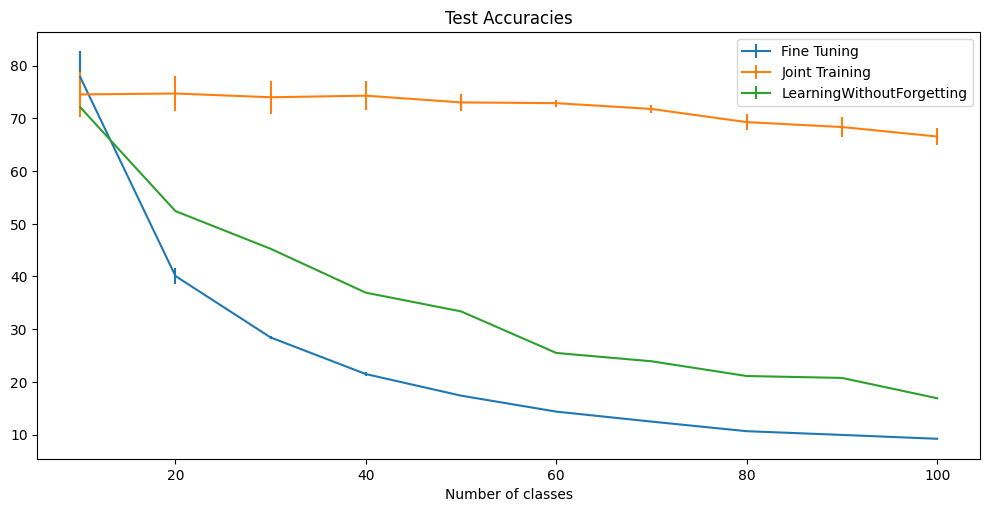

In [60]:
plot_test_accuracy(FineTuning_test_accuracy_stats, JointTraning_test_accuracy_stats, Lwf10_test_accuracy_stats)